In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
#import the language detection dataset
data = pd.read_csv("Language Detection.csv")

In [ ]:
#counting the values for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
#separating independent and dependent features where text is the independent variable and language is the dependent variable
X = data["Text"]
y = data["Language"]

In [ ]:
#performing label encoding on the output variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
#converting text into numerical form by creating a Bag of Words model using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [ ]:
#creating train set using train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
#using naive bayes algorithm for model creation
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

#predicting the output for the test set.
y_pred = model.predict(x_test)

In [ ]:
#evaluating our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

#printing the accuracy of our model
print("Accuracy is :",ac)

Accuracy is : 0.97678916827853


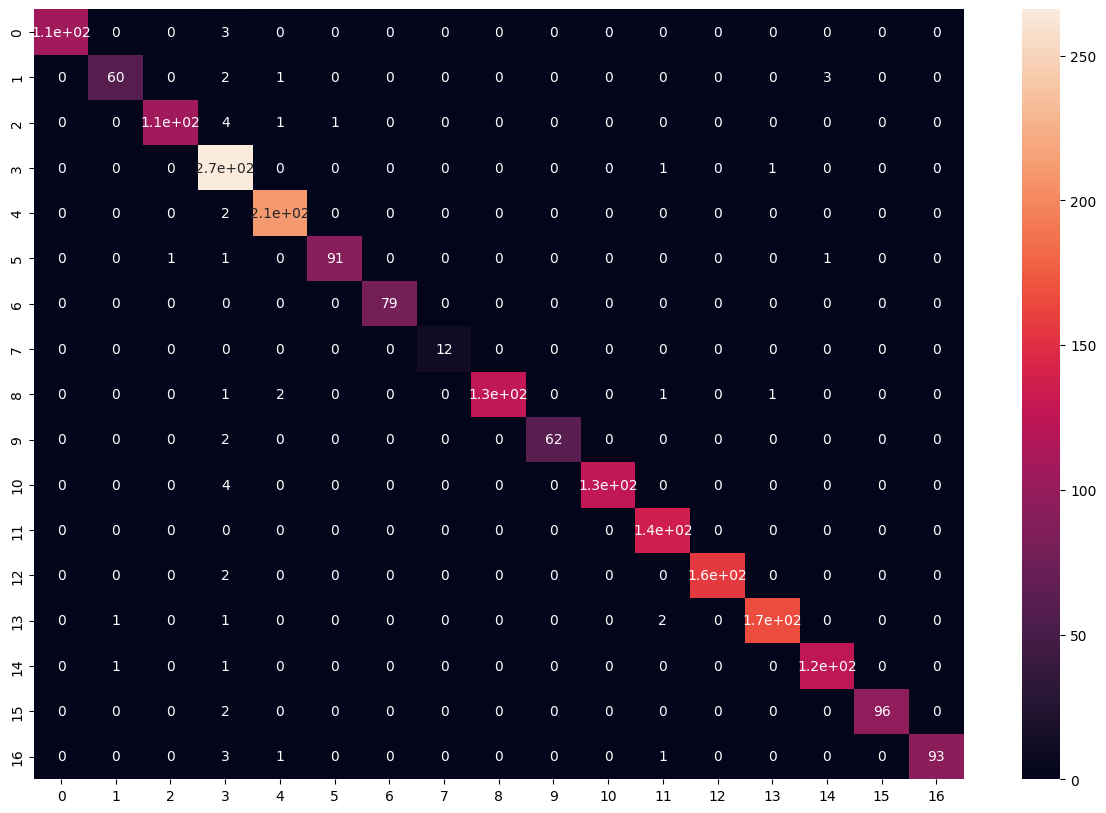

In [ ]:
#plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The language is in",lang[0]) # printing the language

In [ ]:
#English
predict("This is a Language Detection program using NLP.")

The language is in English


In [ ]:
#French
predict("Il s'agit d'un programme de détection du langage utilisant le NLP.")

The language is in French


In [ ]:
#Spanish
predict("Este es un programa de detección de lenguaje que utiliza PNL.")

The language is in Spanish


In [ ]:
#Russian
predict("Это программа определения языка с использованием НЛП.")

The language is in Russian
